# Steps for ML project 
1. Dataset
2. Divide the features based on independent and dependent feature
3. Train Test split
4. Standardization the training data ( it is  applied where algorithm is based on distance or any type)
5. training the model

## Simple Linear Regression


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

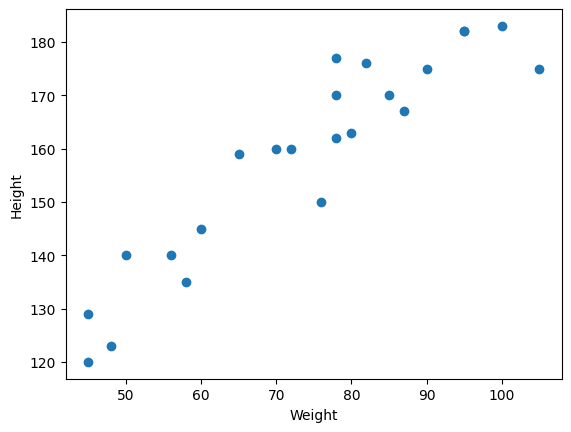

In [5]:
# As we have only two feature independent and dependent so we plot it using scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
# our main aim is to create best fit line such that the difference of point from the line must be minimal
# divide the dataset into independent and dependent features
X = df[['Weight']] # independent feature
y= df['Height'] # dependent feature

- Train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [9]:
X.shape, X_train.shape

((23, 1), (18, 1))

In [10]:
y.shape, y_train.shape

((23,), (18,))

- Standardization 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [13]:
X_train = scaler.fit_transform(X_train) # it needs 2D or dataframe not series or 1D
X_test = scaler.transform(X_test)

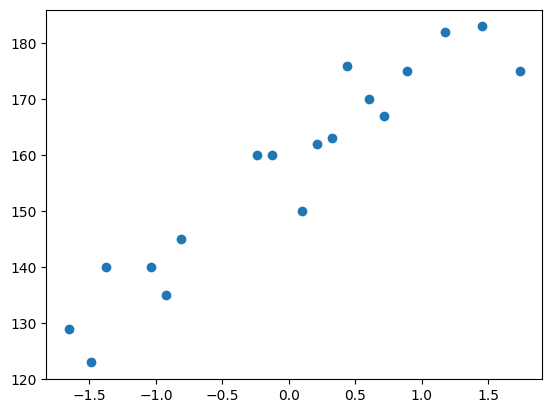

In [14]:
plt.scatter(X_train, y_train)

- training the model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [16]:
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print("the slope or coefficient or weight is " , regressor.coef_)

the slope or coefficient or weight is  [17.03440872]


In [18]:
print("the intercept " , regressor.intercept_)

the intercept  157.5


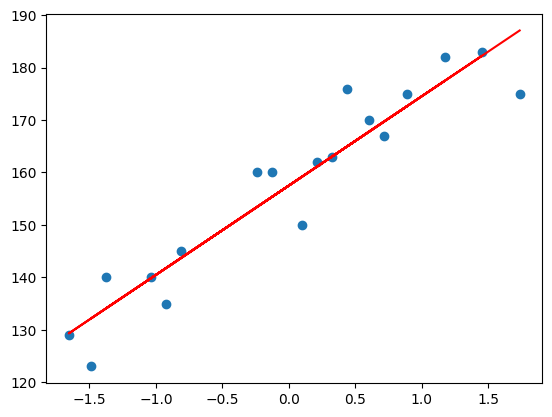

In [19]:
y_pred = regressor.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred , 'r' )

# prediction of train data
1. predicted height ouput = intercept +coef(weight)
2. y_pred_train = 157.5 +17.03(X_test)

# prediction of test data
1. predicted height ouput = intercept+coef(Weight)
2. y_pred_test = 157.5 +17.03(X_test)

In [20]:
y_pred_test = regressor.predict(X_test)

In [21]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

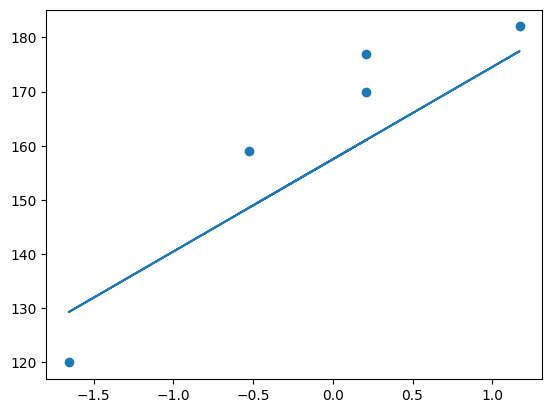

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test))

## performance metrics
MSE, MAE, RMSE, R2, adjustedR2

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [24]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

109.77592599051664 9.822657814519232 10.477400726827081


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
adjr2score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(score)
print(adjr2score)

0.776986986042344
0.7026493147231252


In [26]:
## whenever we get new data points let it be 80
scaled_weight = scaler.transform([[80]])
scaled_weight[0]

c:\Users\asus\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.32350772])

In [27]:
print('the height prediction for weight 80 kg is :' ,regressor.predict([scaled_weight[0]]))

the height prediction for weight 80 kg is : [163.01076266]


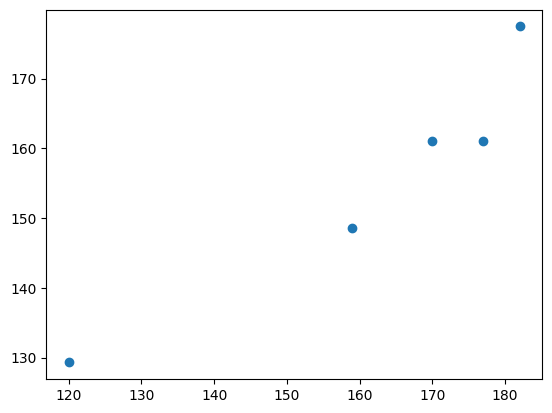

In [28]:
## Assumptions  ## it means these are checking points for good model
plt.scatter(y_test, y_pred_test) # if it is linear then you have done good modelling

In [29]:
# Residuals
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

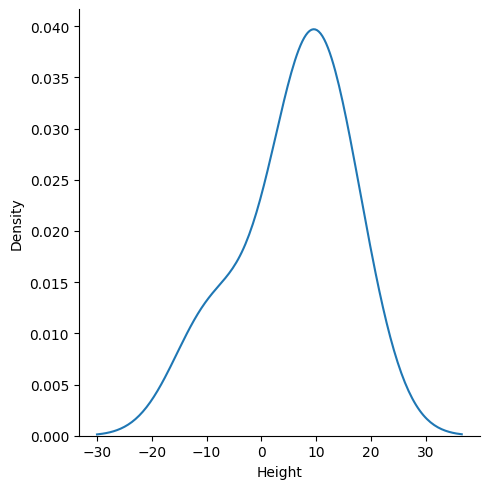

In [31]:
## plot the residuals
import seaborn as sns
sns.displot(residuals, kind='kde') # it must be a kind of normal distribution
